# CASE STUDY-BANKING

# CREDIT CARD PREDICTION

In [1]:
import pandas as pd
import numpy as np

In [2]:
credit=pd.read_excel('CREDIT CARD USERS DATA.xlsx')
credit.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(31), int64(99), object(2)
memory usage: 5.0+ MB


In [4]:
credit.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=132)

In [5]:
# Null values are represent by #null! which is a string due to which 
#variable dtypes become object replacing it with np.nan
credit=credit.replace(to_replace='#NULL!',value=np.nan)

# CREATING DEPENDENT VARIABLE

In [6]:
credit.cardspent.isnull().sum()

0

In [7]:
credit.card2spent.isnull().sum()

0

In [8]:
credit['totalspent']=credit['cardspent']+credit['card2spent']

In [9]:
credit.sample(5)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalspent
301,9357-WUXLKE-TTP,5,3.0,1,27,3,August,18,4,2,...,1,1,1,0,1,1,0,1,0,343.60
998,5714-IHLOXZ-QKC,3,4.0,1,52,5,March,12,2,2,...,0,1,1,0,1,0,0,0,0,246.99
702,7336-YMICSH-AEW,3,2.0,1,21,2,July,16,3,2,...,0,1,1,1,0,0,0,0,0,229.24
3337,8665-ZTJWBH-V5O,3,3.0,0,46,4,December,17,4,6,...,1,1,1,0,0,1,0,0,0,195.24
2328,4275-IOZLLU-SSP,2,3.0,0,36,4,January,18,4,2,...,0,1,1,1,0,0,1,0,0,399.66


In [10]:
#dropping variables used to create dependent variable
credit.drop(columns=['cardspent','card2spent'],axis=1,inplace=True)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

 ## **Check the variable distribution** 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


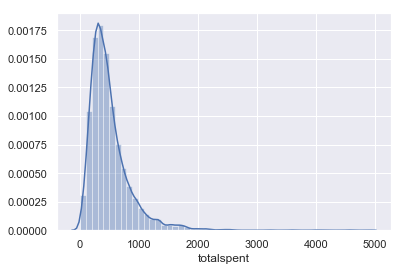

In [12]:
sns.distplot(credit.totalspent,hist=True)

**As you can see distibution is rightly skewed so we need to take log transformation**

In [13]:
credit['totalspent'].describe()

count    5000.00000
mean      498.07863
std       351.52927
min         8.11000
25%       276.28250
50%       414.25000
75%       615.56250
max      4881.05000
Name: totalspent, dtype: float64

**.** The distribution of the totalspent variable aligns with the above   statistics i.e.,the distribution is rightly skewed

**.** The median of totalspent on the credit card  is Rs. 414.25


**.** 75% of credit card have totalspent below Rs. 615.56


**.** The maximum totalspent from the credit card is Rs. 4881.05

# **New Dependent variable**

In [14]:
credit['log_total_spent']=np.log(credit['totalspent']+1)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


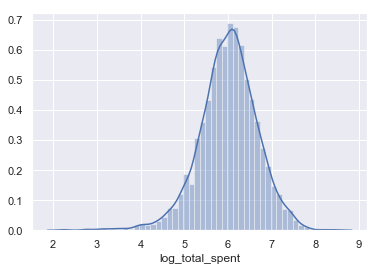

In [15]:
sns.distplot(credit['log_total_spent'],hist=True)

In [16]:
#dropping the totalspent variable from dataframe bcoz we have obtain new dependent variable
credit.drop(columns=['totalspent'],axis=1,inplace=True)

In [17]:
import pandas_profiling

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\ProgramDa

In [18]:
pandas_profiling.ProfileReport(credit)

Number of variables,131
Number of observations,5000
Total Missing (%),0.2%
Total size in memory,5.0 MiB
Average record size in memory,1.0 KiB
Numeric,60
Categorical,1
Boolean,49
Date,0
Text (Unique),1
Rejected,20


In [19]:
col=['agecat','edcat','inccat','spoused','spousedcat','addresscat','commutecat',
    'card2tenure','card2tenurecat','equipmon','longten']
credit.drop(col,axis=1,inplace=True)

In [20]:
#Imporing Data Dictionary as 'Dictionary'
dictionary=pd.read_excel('CREDIT CARD USERS DATA.xlsx','Data Dictionary')
dictionary.head()

,Numeric Variable,Label,Unnamed: 2,Categorical Variable,Unnamed: 4,Label.1
0,custid,Customer ID,NaN,region,1,Zone 1
1,region,Geographic indicator,NaN,NaN,2,Zone 2
2,townsize,Size of hometown,NaN,NaN,3,Zone 3
3,gender,Gender,NaN,NaN,4,Zone 4
4,age,Age in years,NaN,NaN,5,Zone 5


In [21]:
dict(dictionary.loc[:,'Categorical Variable'].value_counts())

{'commutecar': 1,
 'owncd': 1,
 'polparty': 1,
 'cardtenurecat': 1,
 'carbuy': 1,
 'owndvd': 1,
 'response_01': 1,
 'forward': 1,
 'polview': 1,
 'card2fee': 1,
 'callcard': 1,
 'equip': 1,
 'confer': 1,
 'address': 1,
 'wireless': 1,
 'union': 1,
 'callwait': 1,
 'ownfax': 1,
 'commutewalk': 1,
 'tollfree': 1,
 'agecat': 1,
 'hometype': 1,
 'callid': 1,
 'vote': 1,
 'ownvcr': 1,
 'card': 1,
 'region': 1,
 'commutecarpool': 1,
 'townsize': 1,
 'ownpda': 1,
 'internet': 1,
 'default': 1,
 'cartype': 1,
 'jobsat': 1,
 'commuterail': 1,
 'card2tenure': 1,
 'commutenonmotor': 1,
 'empcat': 1,
 'edcat': 1,
 'commutebike': 1,
 'cardfee': 1,
 'card2benefit': 1,
 'news': 1,
 'owngame': 1,
 'bfast': 1,
 'employ': 1,
 'response_02': 1,
 'commutecat': 1,
 'commutemotorcycle': 1,
 'inccat': 1,
 'spousedcat': 1,
 'addresscat': 1,
 'ebill': 1,
 'active': 1,
 'cardbenefit': 1,
 'gender': 1,
 'voice': 1,
 'multline': 1,
 'cardtype': 1,
 'commutepublic': 1,
 'polcontrib': 1,
 'reason': 1,
 'ownpc': 1,


In [22]:
#Defining Categorical variables as cat_var
cat_var=dictionary[dictionary['Categorical Variable'].isnull()==False]['Categorical Variable']
cat_var.head()
list(cat_var)

['region',
 'townsize',
 'gender',
 'agecat',
 'birthmonth',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'inccat',
 'default',
 'jobsat',
 'marital',
 'spousedcat',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'card2tenure',
 'card2tenurecat',
 'active',
 'bfast',
 'churn',
 'tollfree',
 'equip',
 'callcard',
 'wireless',
 'multline',
 'voice',
 'pager',
 'internet',
 'callid',
 'callwait',
 'forward',
 'confer',
 'ebill',
 'owntv',
 'ownvcr',
 'owndvd',
 'owncd',
 'ownpda',
 'ownpc',
 'ownipod',

In [23]:
for features in ['region','townsize','gender','birthmonth',
                 'jobcat','union', 'employ', 'empcat','retire',
                 'default', 'jobsat', 'marital', 'homeown', 
                 'hometype', 'address', 'cars', 'carown', 'cartype',
                 'carcatvalue', 'carbought', 'carbuy', 'commute', 
                 'commutecar','commutemotorcycle','commutecarpool','commutebus',
                 'commuterail', 'commutepublic', 'commutebike', 'commutewalk',
                 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty',
                 'polcontrib','vote', 'card', 'cardtype', 'cardbenefit',
                 'cardfee', 'cardtenure', 'card2', 'card2type',
                 'card2benefit', 'card2fee',
                 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard',
                 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
                 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr',
                 'owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax',
                 'news', 'response_01', 'response_02', 'response_03']:
    credit[features]=credit[features].astype('object')

# **Seperating numerical & categorical variables**

In [24]:
#credit_num=credit._get_numeric_data()
credit_num=credit.select_dtypes(include=['float64','float32','int64','int32'])
credit_num.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,reside,...,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,log_total_spent
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,3,...,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,5.013697
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,2,...,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,4.363608
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,3,...,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,5.888795
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,5,...,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,5.887242
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,4,...,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,6.232114


In [25]:
credit_cat=credit.select_dtypes(include=['object'])
credit_cat.head()

,custid,region,townsize,gender,birthmonth,jobcat,union,employ,empcat,retire,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,September,1,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,May,2,0,0,1,0,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,June,2,0,16,5,0,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,May,2,0,0,1,0,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,July,2,0,1,1,0,...,1,0,1,0,1,0,0,0,1,0


# **Creating Audit Report**

In [26]:
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.mean(),x.median(),x.var(),x.std(),x.min(),x.dropna().quantile(0.01),
                     x.dropna().quantile(0.05),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()],
                    index=['N','NMISS','MEAN','MEDIAN','VAR','STD','MIN','P1','P5','P25','P50','P75','P90','P95','P99','MAX'])

In [27]:
num_summary=credit_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,MEAN,MEDIAN,VAR,STD,MIN,P1,P5,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,47.025600,47.000000,3.157849e+02,17.770338,18.000000,18.000000,20.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,14.543000,14.000000,1.076550e+01,3.281083,6.000000,8.000000,9.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
income,5000.0,0.0,54.759600,38.000000,3.066669e+03,55.377511,9.000000,9.000000,13.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.010000,1073.000000
lninc,5000.0,0.0,3.699909,3.637586,5.581164e-01,0.747072,2.197225,2.197225,2.564949,3.178054,3.637586,4.204693,4.692261,4.990433,5.605839,6.978214
debtinc,5000.0,0.0,9.954160,8.800000,4.095723e+01,6.399783,0.000000,0.700000,1.900000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000
creddebt,5000.0,0.0,1.857326,0.926437,1.166722e+01,3.415732,0.000000,0.033160,0.101088,0.385520,0.926437,2.063820,4.299470,6.373010,14.280358,109.072596
lncreddebt,4999.0,1.0,-0.130454,-0.076106,1.620678e+00,1.273058,-6.597334,-3.401690,-2.291604,-0.952685,-0.076106,0.724665,1.458625,1.852297,2.658910,4.692014
othdebt,5000.0,0.0,3.654460,2.098540,2.910788e+01,5.395172,0.000000,0.114299,0.287692,0.980301,2.098540,4.314780,8.062046,11.815981,24.064260,141.459150
lnothdebt,4999.0,1.0,0.696915,0.741537,1.273689e+00,1.128578,-4.092107,-2.168241,-1.243483,-0.018987,0.741537,1.462053,2.087178,2.469586,3.180802,4.952011
reside,5000.0,0.0,2.204000,2.000000,1.943173e+00,1.393977,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,9.000000


In [28]:
def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.mode(),x.value_counts()],
                    index=['N','NMISS','MODE','COLUMNNAMES'])

In [29]:
cat1_summary=credit_cat.apply(lambda x: cat_summary(x)).T
cat1_summary

,N,NMISS,MODE,COLUMNNAMES
custid,5000,0,0 0002-GTOKLU-YVY 1 0003-RLTRGE-IW...,3348-VWOBBR-QDR 1 7619-FOJEGG-PCO 1 4528...
region,5000,0,0 5 dtype: object,5 1027 1 1009 3 1003 2 995 4 ...
townsize,4998,2,0 1 dtype: object,1.0 1436 2.0 1048 3.0 907 4.0 85...
gender,5000,0,0 1 dtype: object,"1 2518 0 2482 Name: gender, dtype: int64"
birthmonth,5000,0,0 September dtype: object,September 458 May 451 June ...
jobcat,5000,0,0 2 dtype: object,2 1640 1 1388 6 688 3 620 5 ...
union,5000,0,0 0 dtype: object,"0 4244 1 756 Name: union, dtype: int64"
employ,5000,0,0 0 dtype: object,0 659 1 389 2 318 3 309 4 ...
empcat,5000,0,0 2 dtype: object,2 1180 5 1135 1 1048 3 968 4 ...
retire,5000,0,0 0 dtype: object,"0 4262 1 738 Name: retire, dtype: int64"


In [30]:
allcolumn=[]
for i in credit_cat.columns:
    allcolumn.append(i)

In [31]:
ln_start=credit_cat.columns.str.startswith('ln')
ln_start

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [32]:
ln_start1=np.array(allcolumn)
ln_start1

array(['custid', 'region', 'townsize', 'gender', 'birthmonth', 'jobcat',
       'union', 'employ', 'empcat', 'retire', 'default', 'jobsat',
       'marital', 'homeown', 'hometype', 'address', 'cars', 'carown',
       'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute',
       'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus',
       'commuterail', 'commutepublic', 'commutebike', 'commutewalk',
       'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty',
       'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee',
       'cardtenure', 'card2', 'card2type', 'card2benefit', 'card2fee',
       'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard',
       'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr',
       'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame',
       'ownfax', 'news', 'response_01', 'response_02', 'response_03'],
      dtype='<U

In [33]:
data=ln_start1[ln_start]
data

array([], dtype='<U17')

In [34]:
allcolumn1=[]
for i in credit_num.columns:
    allcolumn1.append(i)

In [35]:
ln_start0=credit_num.columns.str.startswith('ln')
ln_start2=np.array(allcolumn1)
ln_start2
#data1

array(['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt',
       'lncreddebt', 'othdebt', 'lnothdebt', 'reside', 'pets',
       'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles',
       'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue',
       'commutetime', 'cardtenurecat', 'carditems', 'card2items',
       'tenure', 'longmon', 'lnlongmon', 'lnlongten', 'tollmon',
       'lntollmon', 'tollten', 'lntollten', 'lnequipmon', 'equipten',
       'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten',
       'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv',
       'log_total_spent'], dtype='<U15')

In [36]:
#Remove duplicate features like log variables, categorical features which are having numerical features.
#carditems,card2items directly proportional to spent
credit_num.drop(columns=['lncreddebt','lnothdebt','lninc','lnlongmon','lnlongten'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [37]:
# Dropping custid & birthmonth are not helping in analyzing
credit_cat.drop(['custid','birthmonth'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
len(credit_num.columns)

39

In [39]:
len(credit_cat.columns)

74

# **Missing Value Treatment**

In [40]:
(credit_num.isnull().sum().sort_values(ascending=False))*100/len(credit_num)

lnwireten          73.12
lnwiremon          73.12
lnequipmon         65.92
lnequipten         65.92
lntollten          52.44
lntollmon          52.44
lncardten          28.44
lncardmon          28.38
commutetime         0.04
cardten             0.04
reside              0.00
pets_reptiles       0.00
pets_birds          0.00
pets_dogs           0.00
pets_cats           0.00
pets                0.00
log_total_spent     0.00
othdebt             0.00
pets_saltfish       0.00
creddebt            0.00
debtinc             0.00
income              0.00
ed                  0.00
pets_small          0.00
card2items          0.00
pets_freshfish      0.00
carvalue            0.00
cardtenurecat       0.00
carditems           0.00
hourstv             0.00
tenure              0.00
longmon             0.00
tollmon             0.00
tollten             0.00
equipten            0.00
cardmon             0.00
wiremon             0.00
wireten             0.00
age                 0.00
dtype: float64

In [41]:
credit_cat.isnull().sum().sort_values(ascending=False)

townsize             2
response_03          0
commutebike          0
commute              0
commutecar           0
commutemotorcycle    0
commutecarpool       0
commutebus           0
commuterail          0
commutepublic        0
commutewalk          0
carbought            0
commutenonmotor      0
telecommute          0
reason               0
polview              0
polparty             0
polcontrib           0
carbuy               0
carcatvalue          0
response_02          0
default              0
gender               0
jobcat               0
union                0
employ               0
empcat               0
retire               0
jobsat               0
cartype              0
                    ..
owntv                0
ownvcr               0
owndvd               0
owncd                0
ownpda               0
ownpc                0
ownipod              0
owngame              0
ownfax               0
news                 0
response_01          0
callid               0
internet   

In [42]:
credit_num.drop(columns=['lnwiremon','lnwireten','lnequipten','lnequipmon','lntollmon','lntollten','lncardten','lncardmon'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
#For numeric variables
def missing_imputation(x):
    x=x.fillna(x.mean())
    return x

In [44]:
credit_num=credit_num.apply(lambda x: missing_imputation(x))

In [45]:
#For categorical variables
def missing1_imputation(x):
    x=x.fillna(x.value_counts().index[0])
    return x

In [46]:
credit_cat=credit_cat.apply(lambda x: missing1_imputation(x))

In [47]:
credit_num.isnull().sum()

age                0
ed                 0
income             0
debtinc            0
creddebt           0
othdebt            0
reside             0
pets               0
pets_cats          0
pets_dogs          0
pets_birds         0
pets_reptiles      0
pets_small         0
pets_saltfish      0
pets_freshfish     0
carvalue           0
commutetime        0
cardtenurecat      0
carditems          0
card2items         0
tenure             0
longmon            0
tollmon            0
tollten            0
equipten           0
cardmon            0
cardten            0
wiremon            0
wireten            0
hourstv            0
log_total_spent    0
dtype: int64

In [48]:
credit_cat.isnull().sum()

region               0
townsize             0
gender               0
jobcat               0
union                0
employ               0
empcat               0
retire               0
default              0
jobsat               0
marital              0
homeown              0
hometype             0
address              0
cars                 0
carown               0
cartype              0
carcatvalue          0
carbought            0
carbuy               0
commute              0
commutecar           0
commutemotorcycle    0
commutecarpool       0
commutebus           0
commuterail          0
commutepublic        0
commutebike          0
commutewalk          0
commutenonmotor      0
                    ..
card2fee             0
active               0
bfast                0
churn                0
tollfree             0
equip                0
callcard             0
wireless             0
multline             0
voice                0
pager                0
internet             0
callid     

# **Outlier Treatment**

In [49]:
def outlier_treatment(x):
    x=x.clip_upper(x.quantile(0.99))
    x=x.clip_lower(x.quantile(0.01))
    return x 

In [50]:
credit_num=credit_num.apply(lambda x: outlier_treatment(x))

# **Creating Dummies for categorical variables**

In [51]:
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname)
    col_dummies.drop(col_dummies.columns[0],axis=1,inplace=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [52]:
#boolean variables doesn't required dummie creation, so doing for non-boolean variable
cat_variables=['region','townsize','jobcat','employ','empcat','jobsat','hometype','address',
'cars','carcatvalue','carbought','commute','reason','polview','card','cardtype',
'cardbenefit','cardtenure','card2','card2type','bfast','internet']

In [53]:
#cat_variables=list(credit_cat.columns)

In [54]:
for i in cat_variables:
    credit_cat[i]=credit_cat[i].astype('category')
    credit_cat=create_dummies(credit_cat,i)

In [55]:
credit_cat.head()

,gender,union,retire,default,marital,homeown,carown,cartype,carbuy,commutecar,...,card2_5,card2type_2,card2type_3,card2type_4,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4
0,1,1,0,1,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,0,0,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0


# Merging numerical and categorical data

In [56]:
credit_new=pd.concat([credit_num,credit_cat],axis=1)
credit_new.head()

,age,ed,income,debtinc,creddebt,othdebt,reside,pets,pets_cats,pets_dogs,...,card2_5,card2type_2,card2type_3,card2type_4,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4
0,20.0,15.0,31.0,11.1,1.200909,2.240091,3.0,0.0,0.0,0.0,...,1,0,1,0,0,1,0,0,0,0
1,22.0,17.0,15.0,18.6,1.222020,1.567980,2.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,67.0,14.0,35.0,9.9,0.928620,2.536380,3.0,3.0,2.0,1.0,...,0,0,0,0,0,1,0,0,0,0
3,23.0,16.0,20.0,5.7,0.033160,1.117200,5.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
4,26.0,16.0,23.0,1.7,0.214659,0.176341,4.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,1,0


In [57]:
credit_new.shape

(5000, 309)

# **Spliting data into train & test data**

In [58]:
feature_columns=credit_new.columns.difference(['log_total_spent'])
feature_columns

Index(['active', 'address_1', 'address_10', 'address_11', 'address_12',
       'address_13', 'address_14', 'address_15', 'address_16', 'address_17',
       ...
       'townsize_2.0', 'townsize_3.0', 'townsize_4.0', 'townsize_5.0', 'union',
       'voice', 'vote', 'wireless', 'wiremon', 'wireten'],
      dtype='object', length=308)

In [59]:
from sklearn.cross_validation import train_test_split
train_X,test_X,train_y,test_y = train_test_split(credit_new[feature_columns],
                                                 credit_new['log_total_spent'],
                                                test_size=0.3,random_state=123)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [60]:
print(len(train_X))
print(len(test_X))

3500
1500


# **Feature selection or variable reduction using random forest**

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [62]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [63]:
param_grid={'n_estimators':np.arange(10,25)}

In [64]:
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2)

In [65]:
# fit the model
tree.fit(train_X,train_y)

GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
tree.best_params_

{'n_estimators': 24}

In [67]:
# we can take n_estim
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=24)
radm_clf.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=24, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [68]:
radm_clf.oob_score_

0.570658021338427

In [69]:
from sklearn import metrics

In [70]:
feature_rank=pd.DataFrame(radm_clf.feature_importances_, index=train_X.columns, columns={'Coefficients' : 0})
feature_rank.sort_values('Coefficients',ascending=False,inplace=True)
feature_rank

,Coefficients
card2items,2.798756e-01
carditems,2.417780e-01
income,1.186686e-01
carvalue,2.329848e-02
creddebt,1.656497e-02
othdebt,1.441025e-02
commutetime,1.180681e-02
longmon,1.091161e-02
hourstv,9.678300e-03
debtinc,9.456875e-03


In [71]:
#Select features and then convert it into list
x=list(feature_rank.index[0:40])
print(x)

['card2items', 'carditems', 'income', 'carvalue', 'creddebt', 'othdebt', 'commutetime', 'longmon', 'hourstv', 'debtinc', 'ed', 'age', 'cardmon', 'tenure', 'cardten', 'reason_2', 'tollten', 'equipten', 'pets', 'wiremon', 'card2benefit', 'card_4', 'reside', 'tollmon', 'wireten', 'pets_freshfish', 'pets_dogs', 'card_3', 'pets_cats', 'gender', 'card_2', 'card2_4', 'cardtenurecat', 'commutebus', 'ownipod', 'commutewalk', 'card2_3', 'townsize_2.0', 'callwait', 'active']


In [72]:
#creating dataframe from selected features:
new_features=['income', 'othdebt', 'creddebt', 'debtinc', 'card_3', 'carvalue',
              'longmon', 'cardmon', 'age', 'commutetime', 'card_2', 'hourstv', 
              'card_4', 'tenure', 'ed', 'cardten', 'reason_2', 'pets', 
              'equipten', 'card2benefit', 'tollten', 'reside', 'tollmon', 
              'card2_2', 'pets_freshfish', 'card2_3', 'card_5', 'pets_dogs',
              'pets_cats', 'wireten', 'cartype', 'gender', 'card2_4', 'active', 
              'polview_4', 'cardbenefit_3', 'commutebus', 'wiremon', 'cars_2']


In [73]:
len(new_features)

39

In [74]:
new_features.append('log_total_spent')
df=credit_new[new_features]

In [75]:
df.head()

,income,othdebt,creddebt,debtinc,card_3,carvalue,longmon,cardmon,age,commutetime,...,cartype,gender,card2_4,active,polview_4,cardbenefit_3,commutebus,wiremon,cars_2,log_total_spent
0,31.0,2.240091,1.200909,11.1,1,14.3,6.50,14.25,20.0,22.0,...,0,1,0,0,0,0,0,0.00,1,5.013697
1,15.0,1.567980,1.222020,18.6,0,6.8,8.90,16.00,22.0,29.0,...,1,0,1,1,1,0,1,45.65,1,4.363608
2,35.0,2.536380,0.928620,9.9,0,18.8,28.40,23.00,67.0,24.0,...,1,1,1,0,0,0,1,0.00,0,5.888795
3,20.0,1.117200,0.033160,5.7,0,8.7,6.00,21.00,23.0,38.0,...,1,0,0,1,0,0,0,0.00,0,5.887242
4,23.0,0.176341,0.214659,1.7,0,10.6,3.05,17.25,26.0,32.0,...,1,0,0,1,1,0,0,19.05,0,6.232114


# **Multicollinearity**

In [76]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [77]:
#deleting last features i.e.,log_total_spent
del new_features[-1]

In [78]:
%%capture
#together features
features= "+".join(new_features)

In [79]:
y, X = dmatrices('log_total_spent~' + features,data=df, return_type='dataframe')

In [80]:
# Calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [81]:
vif.sort_values(by=['VIF Factor'],ascending=False)


,VIF Factor,features
0,113.549221,Intercept
18,13.282394,pets
25,11.834884,pets_freshfish
21,11.162004,tollten
16,10.028956,cardten
23,9.769026,tollmon
30,7.884243,wireten
38,7.276334,wiremon
1,7.254722,income
8,6.514683,cardmon


In [82]:
vif1=vif[vif['VIF Factor']>10].reset_index().loc[:,['features']]
vif1.drop([0],axis=0,inplace=True)
drop_vars= vif1["features"].tolist()
drop_vars


['cardten', 'pets', 'tollten', 'pets_freshfish']

In [83]:
df.drop(drop_vars,axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [84]:
df.shape

(5000, 36)

## Check 3 - All x variables should have a linear relationship with Y

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


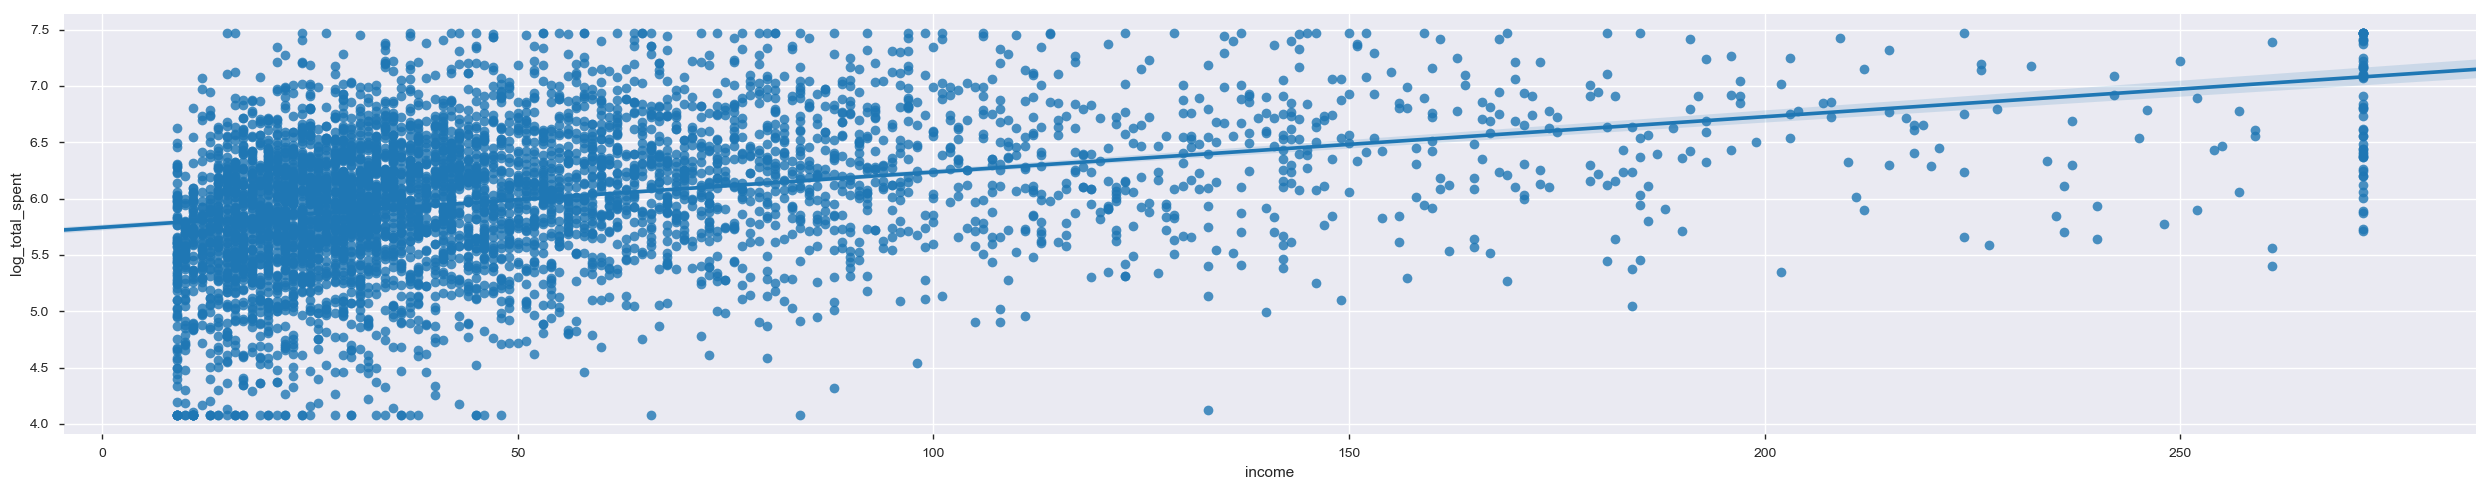

In [85]:
sns.lmplot(x="income",y="log_total_spent",data=df,aspect=5,scatter_kws={'alpha':0.8})

# Spliting data into train and test data

In [86]:
# Dropping variables one at a time which have p-values greater than 5%
feature_column=df.columns.difference(['log_total_spent','ed', 'debtinc', 
                                      'wiremon', 'commutebus', 'commutetime', 
                                      'longmon','pets_cats', 'active', 
                                      'pets_dogs', 'wireten', 'polview_4',
                                      'tenure','tollmon', 'cardbenefit_3',
                                      'reside', 'card2benefit', 'cars_2',
                                      'creddebt', 'cardmon', 'othdebt', 
                                      'equipten'])
feature_column

Index(['age', 'card2_2', 'card2_3', 'card2_4', 'card_2', 'card_3', 'card_4',
       'card_5', 'cartype', 'carvalue', 'gender', 'hourstv', 'income',
       'reason_2'],
      dtype='object')

In [87]:
from sklearn.cross_validation import train_test_split
train_X,test_X,train_y,test_y = train_test_split(df[feature_column],
                                                 df['log_total_spent'],
                                                test_size=0.3,random_state=120)

# Building Regression model using statsmodels.api

In [88]:
import statsmodels.api as sm

In [89]:
train_X=sm.add_constant(train_X)
test_X=sm.add_constant(test_X)
lm=sm.OLS(train_y,train_X).fit()

In [90]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_total_spent   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     106.3
Date:                Thu, 06 Aug 2020   Prob (F-statistic):          1.83e-256
Time:                        22:36:49   Log-Likelihood:                -2822.7
No. Observations:                3500   AIC:                             5675.
Df Residuals:                    3485   BIC:                             5768.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4986      0.054    121.288      0.000       6.394       6.604
age           -0.0022      0.001     -4.204      0.000      -0.003      -0.001
card2_2       -0.3292      0.028    -11.952      0.000      -0.383      -0.275
card2_3       -0.3162      0.027    -11.676      0.000      -0.369      -0.263
card2_4       -0.3038      0.029    -10.331      0.000      -0.362      -0.246
card_2        -0.5789      0.029    -19.722      0.000      -0.636      -0.521
card_3        -0.5741      0.029    -19.493      0.000      -0.632      -0.516
card_4        -0.6401      0.030    -21.480      0.000      -0.699      -0.582
card_5        -0.5005      0.050    -10.091      0.000      -0.598      -0.403
cartype       -0.0215      0.016     -1.339      0.181      -0.053       0.010
carvalue       0.0016      0.001      1.790      0.074      -0.000       0.003
gender        -0.0611      0.018     -3.310      0.001      -0.097      -0.025
hourstv        0.0049      0.002      2.714      0.007       0.001       0.008
income         0.0042      0.000     10.773      0.000       0.003       0.005
reason_2       0.2600      0.037      7.119      0.000       0.188       0.332
==============================================================================
Omnibus:                       59.904   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.761
Skew:                          -0.316   Prob(JB):                     2.35e-14
Kurtosis:                       3.175   Cond. No.                         637.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
lm.pvalues.sort_values(ascending=False)

cartype     1.807526e-01
carvalue    7.352339e-02
hourstv     6.690037e-03
gender      9.429544e-04
age         2.683284e-05
reason_2    1.312412e-12
card_5      1.277638e-23
card2_4     1.157906e-24
income      1.211634e-26
card2_3     6.348185e-31
card2_2     2.689780e-32
card_3      2.084013e-80
card_2      3.593784e-82
card_4      3.233768e-96
const       0.000000e+00
dtype: float64

In [92]:
print('Parameters:', lm.params) # Find the parameters of x
print('R2: ', lm.rsquared) # Find the r**2

Parameters: const       6.498624
age        -0.002224
card2_2    -0.329247
card2_3    -0.316219
card2_4    -0.303849
card_2     -0.578920
card_3     -0.574081
card_4     -0.640107
card_5     -0.500451
cartype    -0.021483
carvalue    0.001606
gender     -0.061119
hourstv     0.004866
income      0.004165
reason_2    0.260042
dtype: float64
R2:  0.2993294734952926


# Model Accuracy

In [93]:
test_pred=lm.predict(test_X)
train_pred=lm.predict(train_X)

from sklearn import metrics

print('MSE Test:',metrics.mean_squared_error(test_y,test_pred))
print('MSE Train:',metrics.mean_squared_error(train_y,train_pred))


MSE Test: 0.27979932802098756
MSE Train: 0.29378797323699035


In [94]:
print ('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print ('MSE:', metrics.mean_squared_error(test_y, test_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 0.41339562153676057
MSE: 0.27979932802098756
RMSE: 0.5289606110297699


In [95]:
MAPE_train = '%.3f' % np.mean(np.abs(train_y-train_pred)/(train_y))
MAPE_test = '%.3f' % np.mean(np.abs(test_y-test_pred)/(test_y))

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)


MAPE of training data:  0.074  |  MAPE of testing data:  0.072


# Check Normality and Residuals

**We will use Q-Q plot to examine this**

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


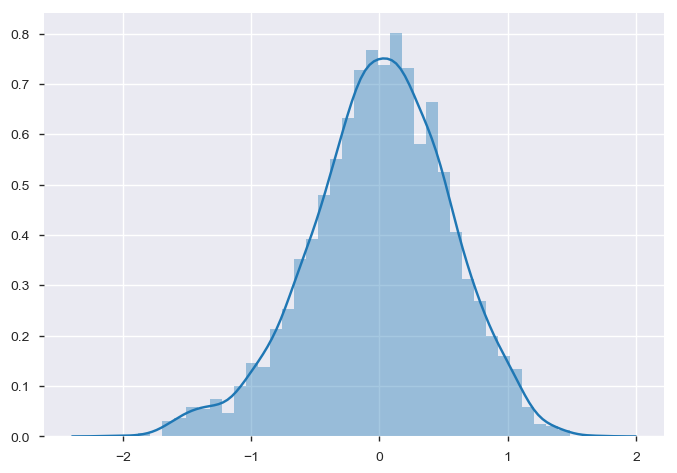

In [96]:
residuals=train_y-train_pred

import seaborn as sns

sns.distplot(residuals)

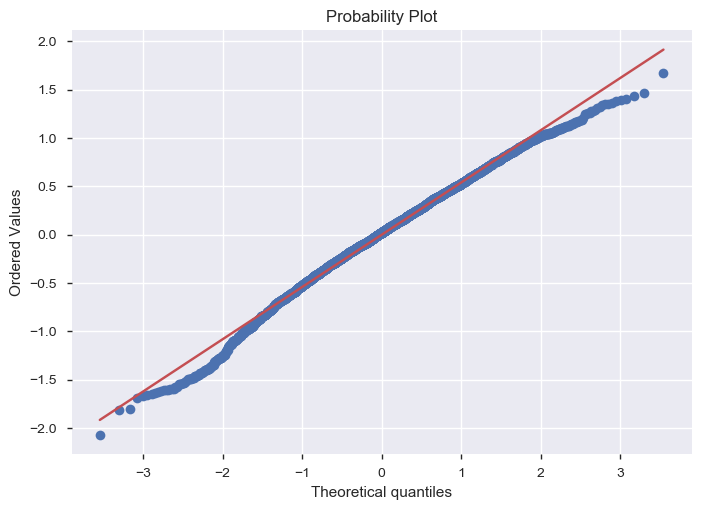

In [97]:
from scipy import stats
import pylab

stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()


**From the above histogram and Q-Q plot, shows that the residuals are normally distributed, so our assumption is not violated**

# Predicting sales:

**We are going to credit card sales on Testing data**

In [98]:
df=df[feature_column]

df=sm.add_constant(df)

df.head()


,const,age,card2_2,card2_3,card2_4,card_2,card_3,card_4,card_5,cartype,carvalue,gender,hourstv,income,reason_2
0,1.0,20.0,0,0,0,0,1,0,0,0,14.3,1,13.0,31.0,0
1,1.0,22.0,0,0,1,1,0,0,0,1,6.8,0,18.0,15.0,0
2,1.0,67.0,0,0,1,1,0,0,0,1,18.8,1,21.0,35.0,1
3,1.0,23.0,0,1,0,1,0,0,0,1,8.7,0,26.0,20.0,0
4,1.0,26.0,0,0,0,0,0,1,0,1,10.6,0,27.0,23.0,0


In [99]:
# Used Decision Trees Regressor
from sklearn.tree import DecisionTreeRegressor

In [100]:
dt=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=3)

In [102]:
dt.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

In [103]:
y_pred=dt.predict(test_X)

In [104]:
y_pred

array([5.9756239 , 5.90485682, 5.62639482, ..., 5.90485682, 6.39338549,
       6.39338549])

In [106]:
from sklearn.metrics import mean_squared_error as MSE

In [107]:
mse_dt =  MSE(test_y, y_pred)

In [108]:
mse_dt

0.33881792560857504

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


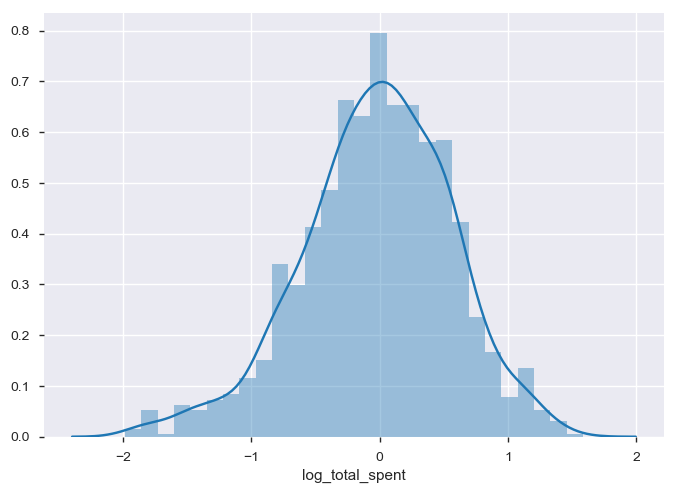

In [109]:
sns.distplot(test_y-y_pred)

# Gradient Boosting

In [110]:

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [112]:
from sklearn import datasets, ensemble
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(train_X, train_y)

mse = MSE(test_y, reg.predict(test_X))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.2761


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


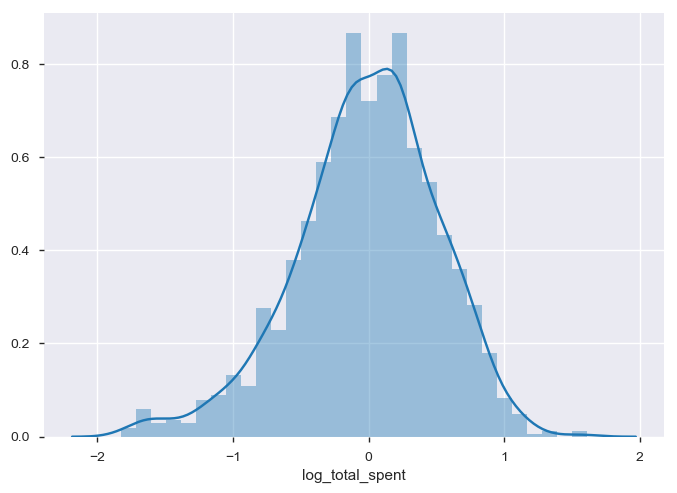

In [113]:
sns.distplot(test_y-reg.predict(test_X))